In [3]:
import pandas as pd
import numpy as np
import os
import sys
import soundfile
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Audio
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM
from keras.callbacks import ModelCheckpoint
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
Ravdess = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\RAVDESS\\audio_speech_actors_01-24"
Crema = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\CREMA\\AudioWAV"
Tess = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\TESS\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data"
Savee = "C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\SAVEE\\AudioData"

In [9]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir)
    actor = os.listdir(actor_path)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '\\' + dir + '\\' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.Emotions.value_counts()

neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: Emotions, dtype: int64

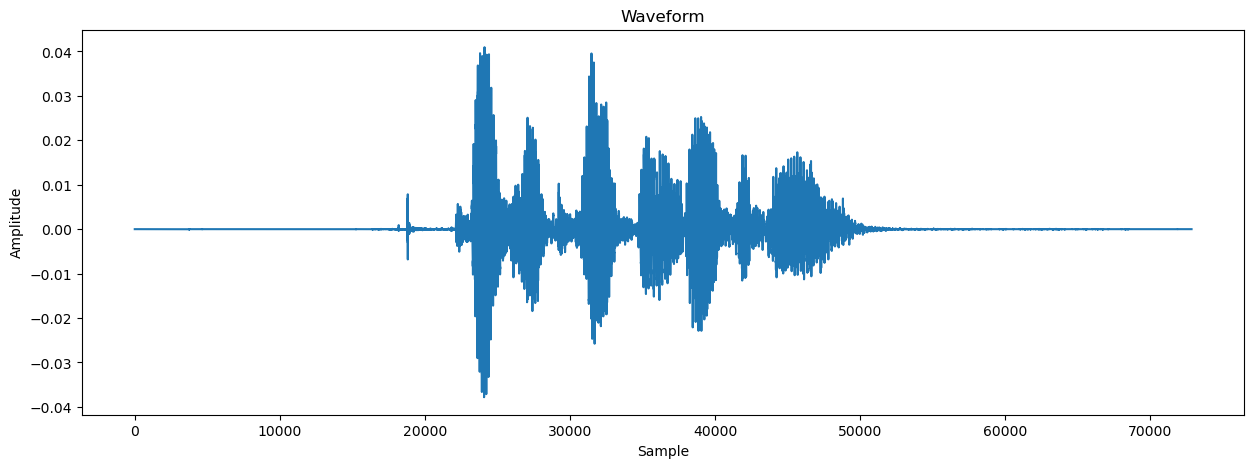

In [12]:
fname = 'C:\\Users\\Patryk\\Desktop\\ML_BADAWCZY\\RAVDESS\\audio_speech_actors_01-24\\Actor_01\\03-01-01-01-01-01-01.wav'
data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()